In [ ]:
# Data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model valuation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
!pip install plot_roc_curve
from sklearn.metrics import plot_roc_curve

ERROR: Could not find a version that satisfies the requirement plot_roc_curve (from versions: none)
ERROR: No matching distribution found for plot_roc_curve


ImportError: ignored

In [ ]:
# Load Data
df =pd.read_csv("heart_disease.csv")
df.shape

(1025, 14)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

<Axes: >

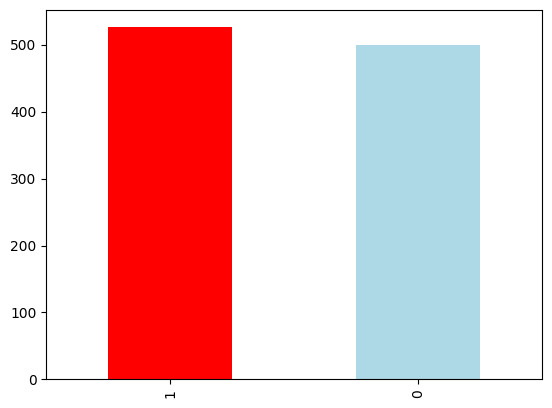

In [ ]:
df["target"].value_counts().plot(kind="bar",color=["red","lightblue"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [ ]:
# compare target colum with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


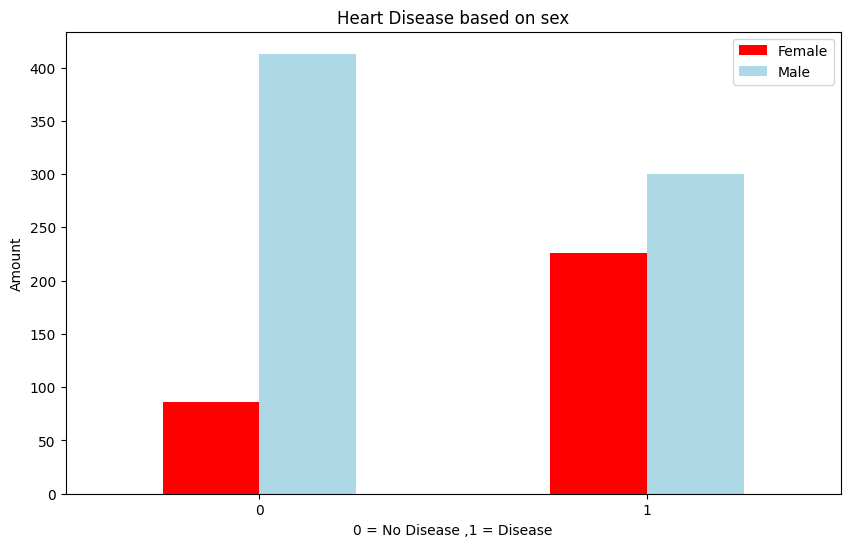

In [ ]:
# create a plot for crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["red","lightblue"])
plt.title("Heart Disease based on sex")
plt.xlabel("0 = No Disease ,1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

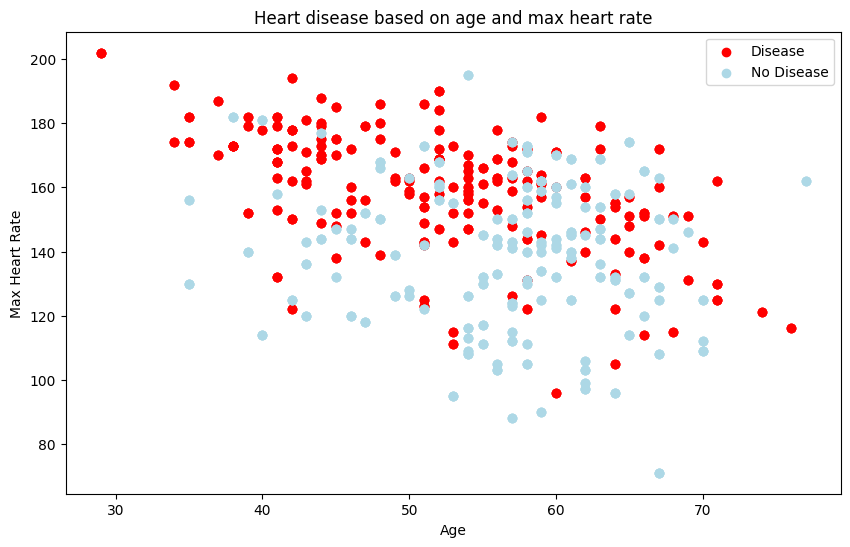

In [ ]:
# Age vs max heart rate (thalach)
plt.figure(figsize=(10,6))
# scatter with positive
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red")
# scatter with negative
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")
plt.title("Heart disease based on age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

<AxesSubplot:ylabel='Frequency'>

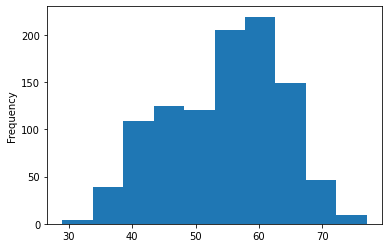

In [ ]:
# check the distribution or spread of data with histogram
df.age.plot.hist()

In [ ]:
# heart disease frequency based on chest pain
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


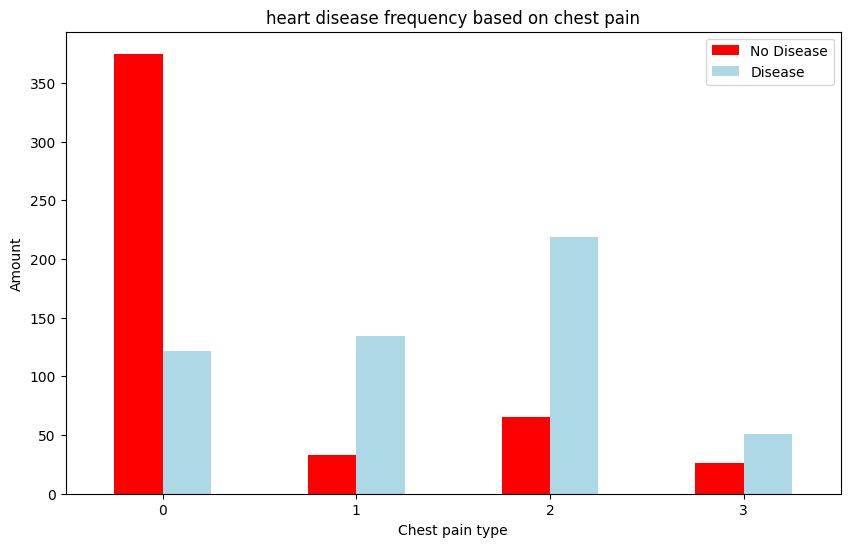

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["red","lightblue"])
plt.title("heart disease frequency based on chest pain")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [ ]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


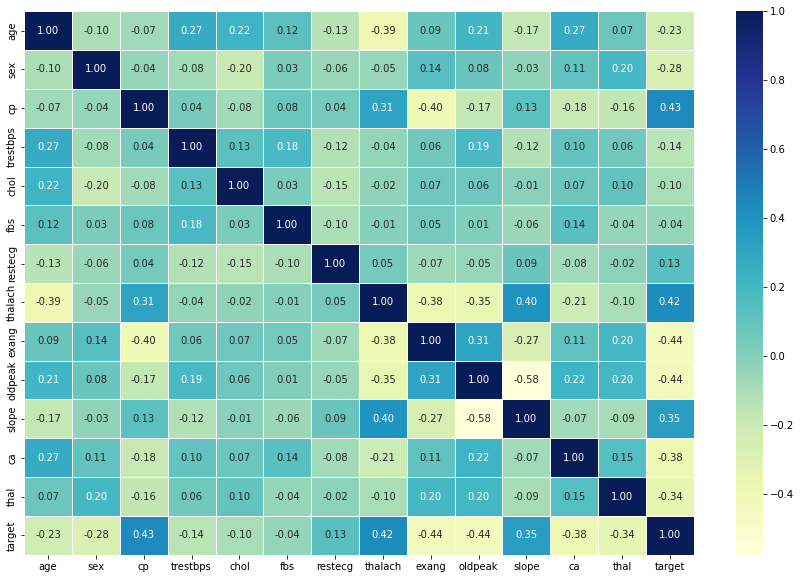

In [ ]:
# correlation matrix heatmap
corr_matrix=df.corr()
fig,ax =plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

In [ ]:
x=df.drop("target",axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
y=df["target"]
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
# Model in a dictionary
models ={"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# train the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Create a function and fit and score the model
def fit_and_score(models,x_train,x_test,y_train,y_test):
  # set random seed
  np.random.seed(45)
  # empty dictionary to keep model score
  model_scores={}
  # loop through the models
  for name,model in models.items():
    # fit the model
    model.fit(x_train,y_train)
    # score the model and append to model_scores
    model_scores[name]=model.score(x_test,y_test)
  return model_scores

In [ ]:
model_scores =fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


{'Logistic Regression': 0.8390243902439024,
 'KNN': 0.7170731707317073,
 'Random Forest': 1.0}

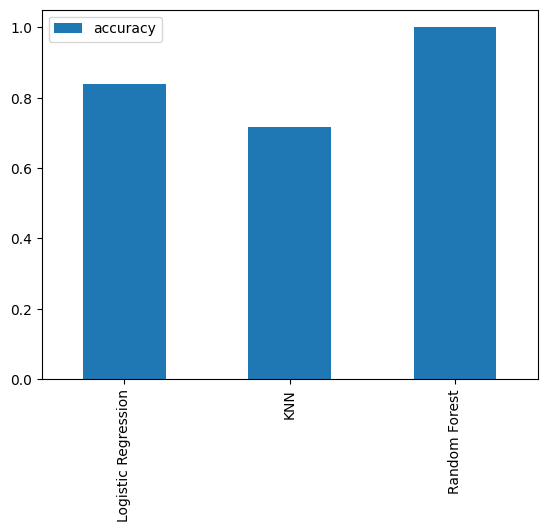

In [ ]:
# comparing the different models
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

In [ ]:
# Tuning KNeighbors Classifier
# hyperparameter for KNN -n_neighbors(By hand)

train_scores =[]
test_scores=[]

neighbors=range(1,21)

knn=KNeighborsClassifier()

# loop through n_neighbors

for i in neighbors:
  knn.set_params(n_neighbors=i)
  # fit the algorithm
  knn.fit(x_train,y_train)
  # update train score
  train_scores.append(knn.score(x_train,y_train))
  # update test score
  test_scores.append(knn.score(x_test,y_test))

In [ ]:
train_scores

[1.0,
 0.9939024390243902,
 0.9865853658536585,
 0.9292682926829269,
 0.9146341463414634,
 0.8512195121951219,
 0.8048780487804879,
 0.7731707317073171,
 0.7658536585365854,
 0.7804878048780488,
 0.7731707317073171,
 0.7634146341463415,
 0.7682926829268293,
 0.7670731707317073,
 0.7670731707317073,
 0.7658536585365854,
 0.7597560975609756,
 0.774390243902439,
 0.7634146341463415,
 0.75]

In [ ]:
test_scores

[0.9853658536585366,
 0.9365853658536586,
 0.8682926829268293,
 0.7560975609756098,
 0.7170731707317073,
 0.7170731707317073,
 0.6829268292682927,
 0.6780487804878049,
 0.7170731707317073,
 0.7219512195121951,
 0.7121951219512195,
 0.7317073170731707,
 0.697560975609756,
 0.697560975609756,
 0.7268292682926829,
 0.7219512195121951,
 0.7219512195121951,
 0.7414634146341463,
 0.7170731707317073,
 0.7073170731707317]

Maximum KNN score on the test data:98.54%


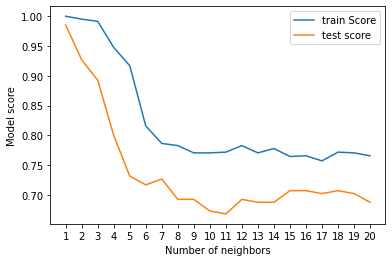

In [ ]:
plt.plot(neighbors,train_scores,label="train Score")
plt.plot(neighbors,test_scores,label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

In [ ]:
# Hyperparameter tuning with RandomizedSearchCV
# For Logistic Regression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

# For RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [ ]:
# For Logistic Regression
np.random.seed(43)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [ ]:
rs_log_reg.score(x_test,y_test)

0.8341463414634146

In [ ]:
# For RandomForestClassifier
np.random.seed(43)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [ ]:
rs_rf.score(x_test,y_test)

0.9707317073170731

In [ ]:
model_scores

{'Logistic Regression': 0.8390243902439024,
 'KNN': 0.7170731707317073,
 'Random Forest': 1.0}

In [ ]:
# GridSearchCV
# Different hyperparameters for LogisticRegression model

log_reg_grid = {"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': 0.05736152510448681, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(x_test,y_test)

0.8390243902439024

In [ ]:
model_scores

{'Logistic Regression': 0.848780487804878,
 'KNN': 0.7317073170731707,
 'Random Forest': 1.0}

In [ ]:
# Evaluating the tuned model

y_preds=gs_log_reg.predict(x_test)
y_preds

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1])

In [ ]:
y_test

294     0
812     0
763     1
118     1
675     0
       ..
1013    0
1007    1
979     0
512     0
455     1
Name: target, Length: 205, dtype: int64

In [ ]:
# ROC curve
plot_roc_curve(gs_log_reg,x_test,y_test)

NameError: ignored

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[78 26]
 [ 7 94]]


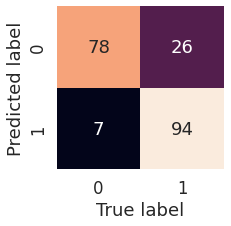

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
  fig,ax=plt.subplots(figsize=(3,3))
  ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                 annot=True,
                 cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_mat(y_test,y_preds)

In [ ]:
# Classification Report
# without cross validation
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       104
           1       0.78      0.93      0.85       101

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



In [ ]:
# with cross validation
gs_log_reg.best_params_


{'C': 0.05736152510448681, 'solver': 'liblinear'}

In [ ]:
clf=LogisticRegression(C= 9.236708571873866,solver="liblinear")

In [ ]:
# cross validated accuracy
cv_acc =cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.88780488, 0.86341463, 0.86829268, 0.82439024, 0.80487805])

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8497560975609757

In [ ]:
# cross validated precision
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision

array([0.85964912, 0.85321101, 0.8362069 , 0.79487179, 0.78947368])

In [ ]:
cv_precision=np.mean(cv_precision)
cv_precision

0.8266825015230749

In [ ]:
# cross validated recall
cv_recall=cross_val_score(clf,x,y,scoring="recall")
cv_recall

array([0.93333333, 0.88571429, 0.92380952, 0.88571429, 0.8490566 ])

In [ ]:
cv_recall=np.mean(cv_recall)
cv_recall

0.8955256064690026

In [ ]:
# cross validated f1
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1

array([0.89497717, 0.86915888, 0.87782805, 0.83783784, 0.81818182])

In [ ]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8595967515545485

<AxesSubplot:title={'center':'cross-validated classification metrics'}>

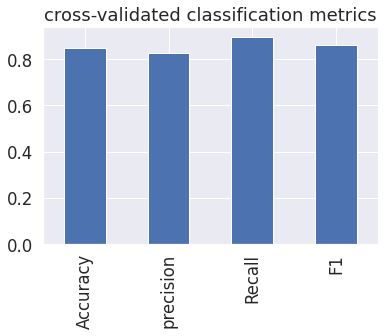

In [ ]:
# Visualize cross-validated metrics

cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "precision":cv_precision,
                         "Recall":cv_recall,
                         "F1":cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="cross-validated classification metrics",legend=False)

In [ ]:
gs_log_reg.best_params_

{'C': 0.05736152510448681, 'solver': 'liblinear'}

In [ ]:
# Feature Importance
clf =LogisticRegression(C=9.236708571873866,solver="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=9.236708571873866, solver='liblinear')

In [ ]:
clf_score=clf.score(x_test,y_test)
clf_score

0.8390243902439024

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# check co-efficient
clf.coef_

array([[-0.00193068, -1.69936591,  0.8171244 , -0.01714316, -0.00522666,
        -0.11781961,  0.3951122 ,  0.02730877, -1.02775489, -0.6530323 ,
         0.4153    , -0.72817057, -0.83084825]])

In [ ]:
# match coeff to column
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': -0.0019306792348103155,
 'sex': -1.6993659074680982,
 'cp': 0.817124402762927,
 'trestbps': -0.017143161408928964,
 'chol': -0.005226660956085538,
 'fbs': -0.11781960586947271,
 'restecg': 0.3951121997342356,
 'thalach': 0.027308770955379723,
 'exang': -1.027754892954944,
 'oldpeak': -0.6530322963384971,
 'slope': 0.4153000000320041,
 'ca': -0.7281705692988545,
 'thal': -0.8308482484026893}

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.001931,-1.699366,0.817124,-0.017143,-0.005227,-0.11782,0.395112,0.027309,-1.027755,-0.653032,0.4153,-0.728171,-0.830848


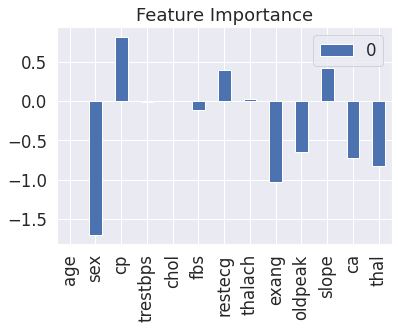

In [ ]:
# visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance")
feature_df

In [ ]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,86,226
1,413,300


In [ ]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,46,28
1,324,158
2,129,340


In [ ]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# sample that predicts 0
sample1 = [60,1,0,150,233,1,1,125,0,2.1,1,2,3]
sample2 =[52,	1,	0,	125,	212,	0,	1	,168,	0	,1.0	,2,	2	,3]

# sample that predicts 1
sample3 =[59	,1,	1,	140,	221,	0,	1,	164,	1	,0.0,	2	,0,	2]
sample4 =[50,	0,	0	,110,	254	,0,	0	,159,	0,	0.0,	2,	0	,2]

# convert the list to array and reshape it to predict
np_array=np.asarray(sample1)
# reshape
reshape=np_array.reshape(-1,1).T
# or use
# reshape=np_array.reshape(1,-1)

# Generate predictions for samples
# predictions = clf.predict(reshape)
# print(predictions)

# prediction with randomized search using random forest
predi =rs_rf.predict(reshape)
print(predi)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  


In [ ]:
# Pickle to export the model
import pickle
filename="heart_disease_prediction.pkl"
pickle.dump(clf,open(filename,"wb"))

In [ ]:
# load the exported model to predict
loaded_model=pickle.load(open(filename,"rb"))
predict=loaded_model.predict(reshape)
print(predict)

[1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Pickle to export the model
import pickle
filename1="heart_disease_prediction_random_forest.pkl"
pickle.dump(rs_rf,open(filename1,"wb"))

In [ ]:
loaded_model=pickle.load(open(filename1,"rb"))
predict=loaded_model.predict(reshape)
print(predict)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  


In [ ]:
import joblib
joblib.dump(rs_rf, filename1)

['heart_disease_prediction_random_forest.pkl']

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename1)
result = loaded_model.score(X_test, Y_test)
print(result)